In [179]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.optimize import fsolve

In [180]:
funcoes = [
    {
        'deriv_py': lambda x, y: x - y,
        'deriv_latex': 'x - y',
        's_exata': lambda x: x - 1 + 2 * np.exp(-x),
        's_exata_latex': 'x - 1 + 2e^{-x}',
        'init_x': 0,
        'valor_inicial': 1,
        'letra': 'a',
        'intervalo': (0, 1)
    },
    {
        'deriv_py': lambda x, y: -2 * x * y,
        'deriv_latex': '-2xy',
        's_exata': lambda x: np.exp(-x**2),
        's_exata_latex': 'e^{-x^2}',
        'init_x': -2.5,
        'valor_inicial': np.exp(-6.25),
        'letra': 'b',
        'intervalo': (-2.5, 2.5)
    },
    {
        'deriv_py': lambda _, y: 5 * y - 1,
        'deriv_latex': '5y - 1',
        's_exata': lambda x: np.exp(5 * x) + 0.2,
        's_exata_latex': 'e^{5x} + 0.2',
        'init_x': 0,
        'valor_inicial': 1.2,
        'letra': 'c',
        'intervalo': (0, 2)
    },
    {
        'deriv_py': lambda x, y: y - x**2 + 1,
        'deriv_latex': 'y - x^2 + 1',
        's_exata': lambda x: (x + 1)**2 - 0.5 * np.exp(x),
        's_exata_latex': '(x + 1)^2 - 0.5e^x',
        'init_x': 0,
        'valor_inicial': 0.5,
        'letra': 'd',
        'intervalo': (0, 2)
    },
    {
        'deriv_py': lambda x, _: 2 * np.exp(x) - 10 * x,
        'deriv_latex': '2e^x - 10x',
        's_exata': lambda x: 2 * np.exp(x) - 5 * x**2 + 9,
        's_exata_latex': '2e^x - 5x^2 + 9',
        'init_x': 0,
        'valor_inicial': 11,
        'letra': 'e',
        'intervalo': (0, 1)
    },
]

In [181]:
h_values = np.logspace(-1, -4, 4)
h_values

array([0.1   , 0.01  , 0.001 , 0.0001])

In [182]:
h_baseline = 0.1

In [183]:
# Erro local
erro_local = lambda y, x_n, y_n: y(x_n) - y_n
# Erro relativo
erro_relativo = lambda exata, numerica: abs((exata - numerica) / exata)

In [184]:
solucoes = [None] * len(funcoes)
for f_idx, funcao in enumerate(funcoes):
    solucoes[f_idx] = []
    #x_baseline = np.arange(funcao['intervalo'][0], funcao['intervalo'][1] + h_baseline, h_baseline)
    for h_value in h_values:
        print(f'Calculando para a função {funcao["letra"]} com h = {h_value}')
        
        x = np.arange(funcao['intervalo'][0], funcao['intervalo'][1] + h_value, h_value)
        x_baseline = np.arange(funcao['intervalo'][0], funcao['intervalo'][1] + h_baseline, h_baseline)

        # TRATAMENTO PARA ARREDONDAMENTO DE VALORES

        # get number of 0s in h
        n_zeros = len(str(h_value).split('.')[1])
        # round values of x and x_baseline according to h
        x = np.round(x, n_zeros)
        x_baseline_round = np.round(x_baseline, n_zeros)

        i_baseline = np.where(np.isin(x, x_baseline_round))

        y_init = funcao['valor_inicial']
        f_deriv = funcao['deriv_py']
        y_exata = funcao['s_exata']
        y_avancada = np.zeros_like(x)
        y_atrasada = np.zeros_like(x)
        y_centrada = np.zeros_like(x)
        # devine os valores iniciais
        y_avancada[0] = y_init
        y_atrasada[0] = y_init
        y_centrada[0] = y_init
        # para centrada, precisamos de um valor inicial a mais
        y_centrada[1] = y_exata(x[1])

        for i in range(1, len(x)):
            # calcula o euler explicito (diferenca avancada)
            y_avancada[i] = y_avancada[i - 1] + h_value * f_deriv(x[i - 1], y_avancada[i - 1])
            # calcula o euler implicito (diferenca atrasada)
            f_atrasada = lambda y: y - y_atrasada[i - 1] - h_value * f_deriv(x[i], y)
            y_atrasada[i] = fsolve(f_atrasada, y_atrasada[i - 1])
            if i > 1:
                # calcula o euler centrado (diferenca central)
                y_centrada[i] = y_centrada[i - 2] + 2 * h_value * f_deriv(x[i - 1], y_centrada[i - 1])

        solucoes[f_idx].append({
            'h': h_value,
            'x': x,
            'y_avn': y_avancada,
            'y_atr': y_atrasada,
            'y_cen': y_centrada,
            'y_exata': y_exata(x),
            # baselines
            'x_baseline': x_baseline,
            'y_avn_baseline': y_avancada[i_baseline],
            'y_atr_baseline': y_atrasada[i_baseline],
            'y_cen_baseline': y_centrada[i_baseline],
            'y_exata_baseline': y_exata(x_baseline),
            # erros -- calcula apenas para os baselines
            'err_rel_avn': erro_relativo(y_exata(x_baseline), y_avancada[i_baseline]),
            'err_rel_atr': erro_relativo(y_exata(x_baseline), y_atrasada[i_baseline]),
            'err_rel_cen': erro_relativo(y_exata(x_baseline), y_centrada[i_baseline]),
            'err_loc_avn': erro_local(y_exata, x_baseline, y_avancada[i_baseline]),
            'err_loc_atr': erro_local(y_exata, x_baseline, y_atrasada[i_baseline]),
            'err_loc_cen': erro_local(y_exata, x_baseline, y_centrada[i_baseline]),
        })

Calculando para a função a com h = 0.1
Calculando para a função a com h = 0.01
Calculando para a função a com h = 0.001
Calculando para a função a com h = 0.0001


C:\Users\Daniel\AppData\Local\Temp\ipykernel_23248\1833238234.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_atrasada[i] = fsolve(f_atrasada, y_atrasada[i - 1])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_23248\1833238234.py:39: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_atrasada[i] = fsolve(f_atrasada, y_atrasada[i - 1])


Calculando para a função b com h = 0.1
Calculando para a função b com h = 0.01
Calculando para a função b com h = 0.001
Calculando para a função b com h = 0.0001
Calculando para a função c com h = 0.1
Calculando para a função c com h = 0.01
Calculando para a função c com h = 0.001
Calculando para a função c com h = 0.0001
Calculando para a função d com h = 0.1
Calculando para a função d com h = 0.01
Calculando para a função d com h = 0.001
Calculando para a função d com h = 0.0001
Calculando para a função e com h = 0.1
Calculando para a função e com h = 0.01
Calculando para a função e com h = 0.001
Calculando para a função e com h = 0.0001


**Pós-processamento**

In [185]:
f_header = '''\\textbf{a)}
\\begin{align*}
  \\begin{cases}
    y' = 2z + xy, x \in [0, 1] \\\\
    y(0) = 1
  \end{cases}
\end{align*}
\\\\
Solução exata: $f'(x) = 2(e^{2x})\cos(e^{2x})$'''

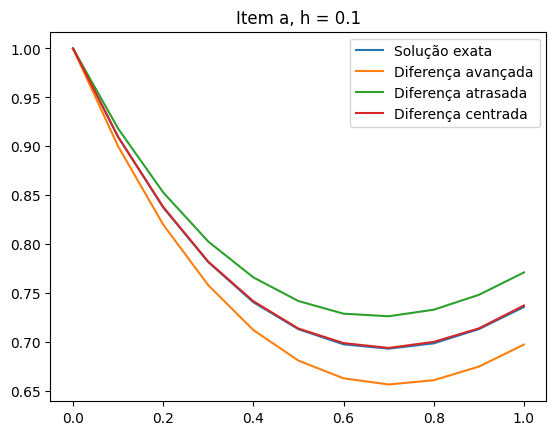

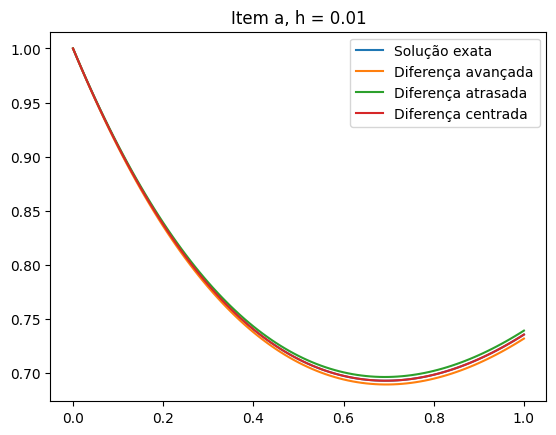

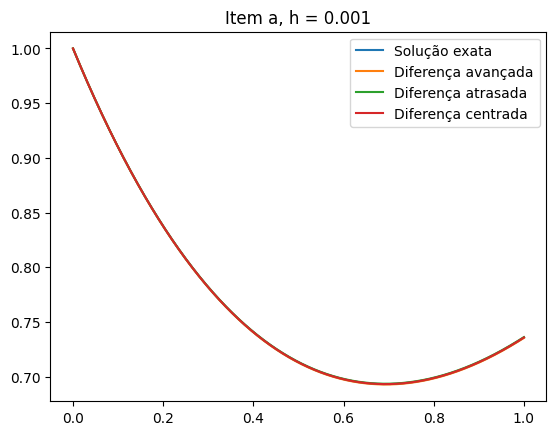

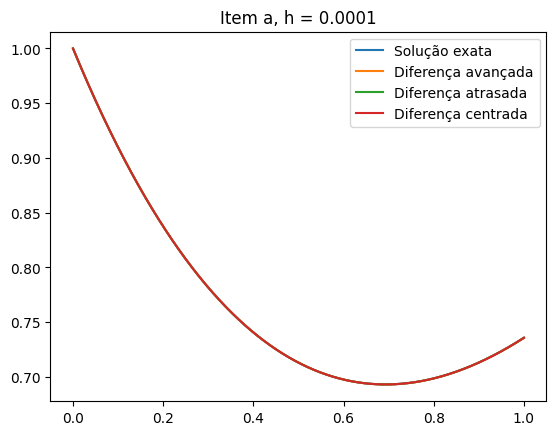

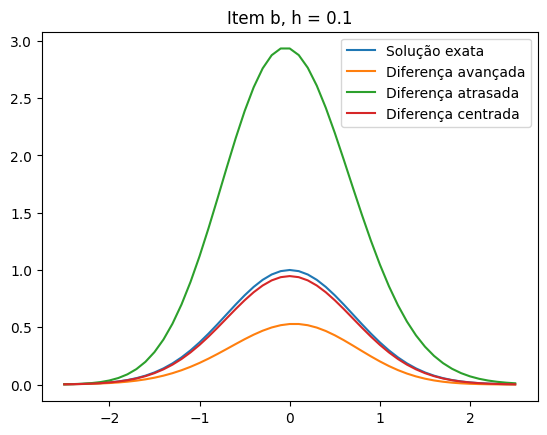

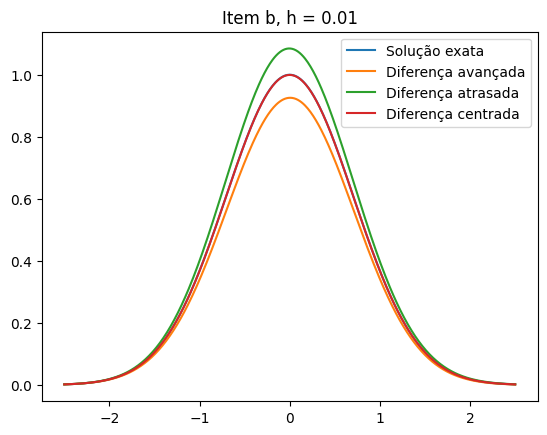

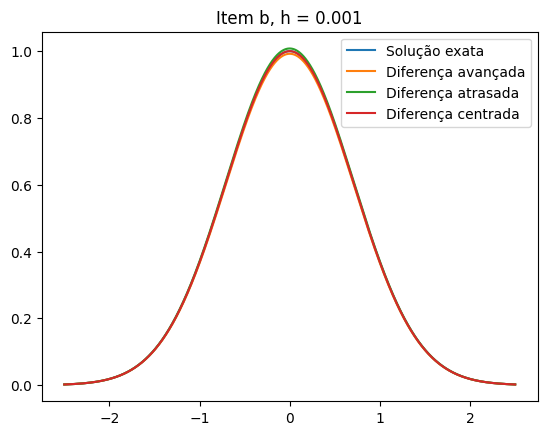

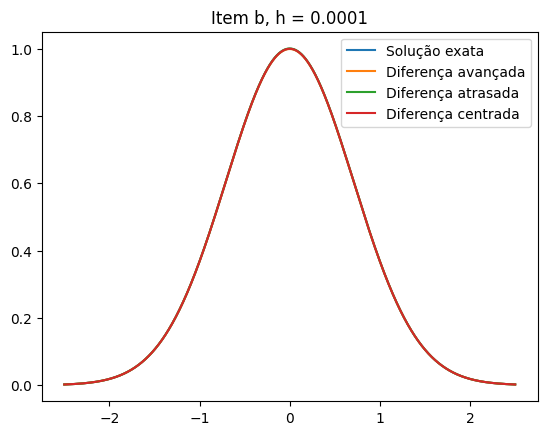

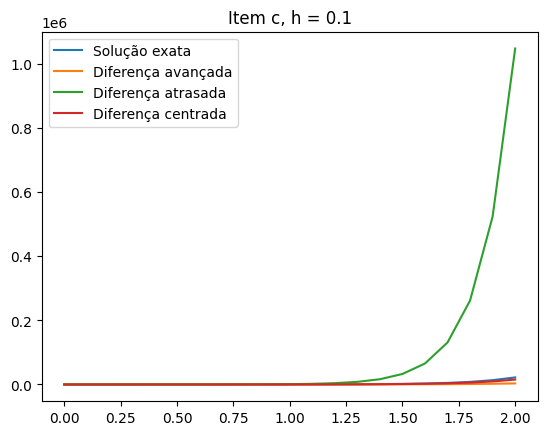

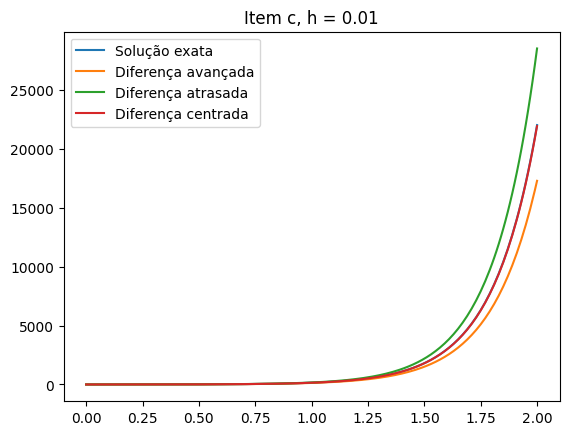

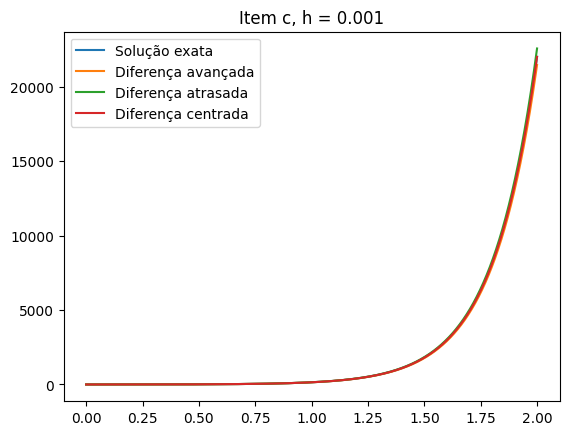

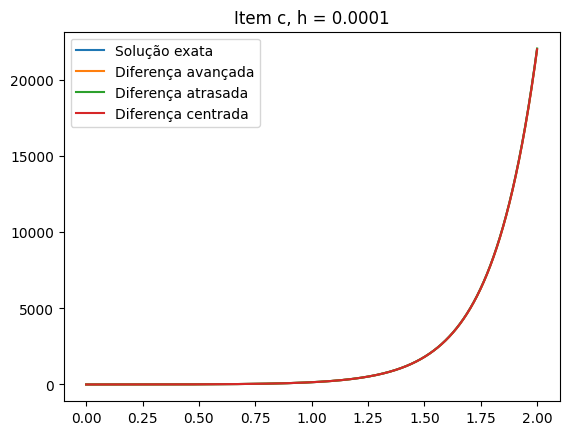

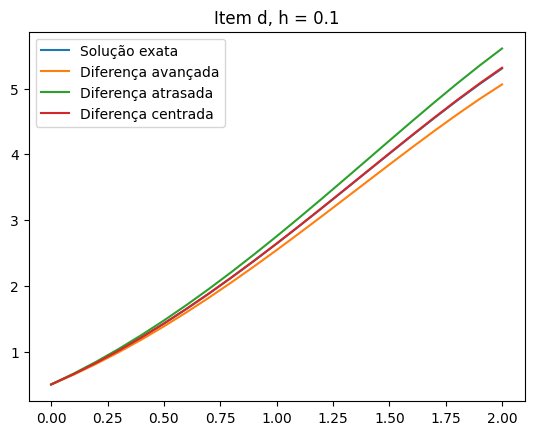

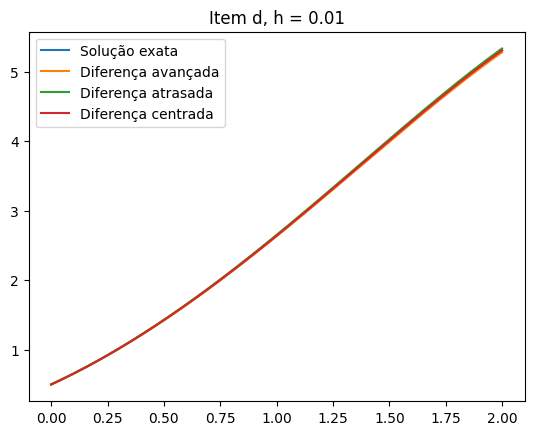

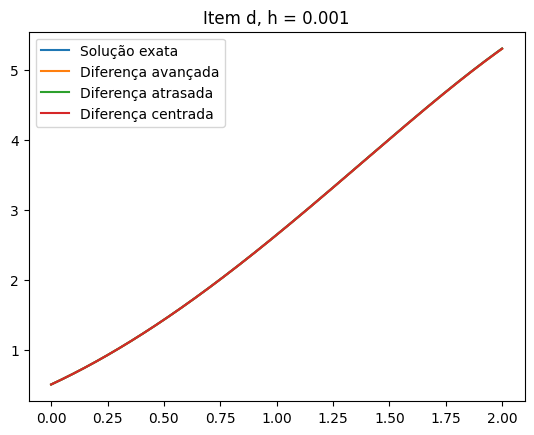

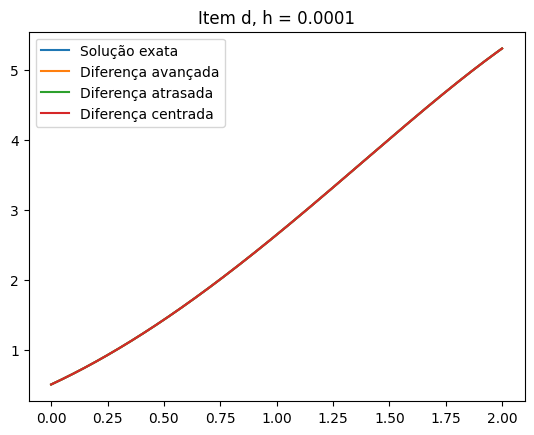

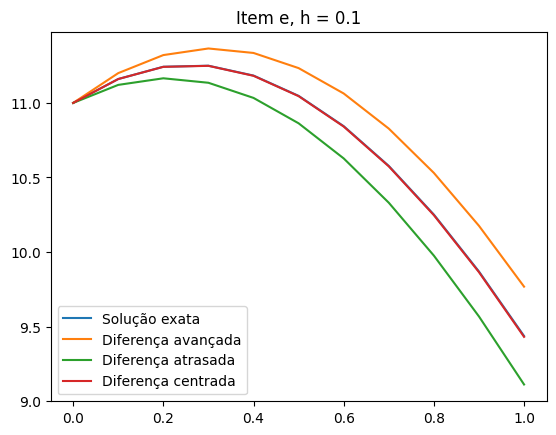

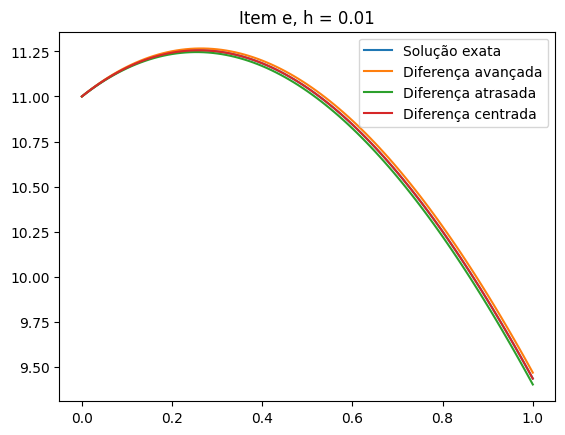

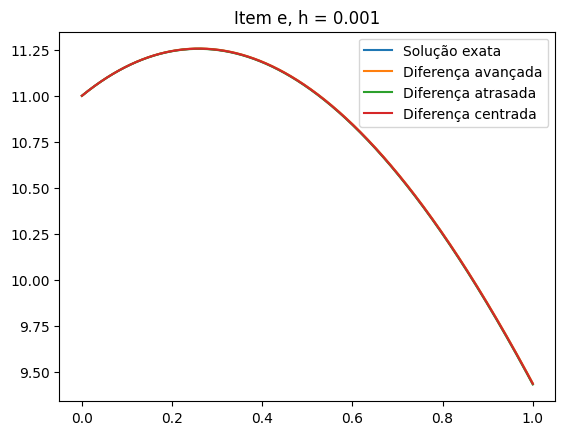

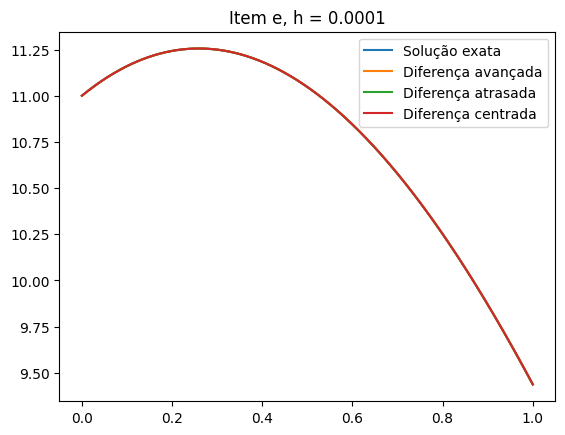

In [186]:
latex = ""
for i in range(len(funcoes)):
    f = funcoes[i]
    s = solucoes[i]

    x_baseline = s[0]['x_baseline']

    f_header = f'''\\textbf{{{f['letra']})}}
    \\begin{{align*}}
    \\begin{{cases}}
        y' = {f['deriv_latex']}, x \in [{f['intervalo'][0]}, {f['intervalo'][1]}] \\\\
        y({f['init_x']}) = {f['valor_inicial']}
    \end{{cases}}
    \end{{align*}}
    \\\\
    Solução exata: y(x) = ${f['s_exata_latex']}$'''

    sol_str = ''

    # montando as soluções em latex
    for hs in s:
        nome_grafico_out = f'{f["letra"]}_h_{hs["h"]}.png'
        # montando o gráfico
        fig, ax = plt.subplots()
        ax.plot(hs['x'], hs['y_exata'], label='Solução exata')
        ax.plot(hs['x'], hs['y_avn'], label='Diferença avançada')
        ax.plot(hs['x'], hs['y_atr'], label='Diferença atrasada')
        ax.plot(hs['x'], hs['y_cen'], label='Diferença centrada')
        # set title
        ax.set_title(f'Item {f["letra"]}, h = {hs["h"]}')
        # set legend
        ax.legend()
        # save the plot
        plt.savefig(f'edcomp_tarefa2_out/{nome_grafico_out}')

        # montando a tabela
        headers = ['x', "y(x)", 'y_avn', 'err_loc_avn', 'err_rel_avn', 'y_atr', 'err_loc_atr', 'err_rel_atr', 'y_cen', 'err_loc_cen', 'err_rel_cen']
        table = []

        for i in range(len(x_baseline)):
            table.append([
                x_baseline[i],
                hs['y_exata_baseline'][i],
                hs['y_avn_baseline'][i],
                hs['err_loc_avn'][i],
                hs['err_rel_avn'][i],
                hs['y_atr_baseline'][i],
                hs['err_loc_atr'][i],
                hs['err_rel_atr'][i],
                hs['y_cen_baseline'][i],
                hs['err_loc_cen'][i],
                hs['err_rel_cen'][i]
            ])
            
        latex_table = tabulate(table, headers=headers, tablefmt='latex')

        latex_table = '\\resizebox{\\textwidth}{!}{\n' + latex_table + '\n}'

        bloco = f'''\includegraphics{{{nome_grafico_out}}}
        \\\\
        {latex_table}
        \\\\
        \\\\
        '''

        sol_str += bloco

    latex += f_header + '\\\\'  + sol_str

In [187]:
# salva o latex
# encoding='utf-8' para evitar problemas com acentos
with open('edcomp_tarefa2_out/solucoes.tex', 'w', encoding='utf-8') as f:
    f.write(latex)